In [145]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import math
import csv
import cv2
import os

In [146]:
inputBasePath = r"C:\Users\emirt\OneDrive\Desktop\cats_and_dogs\images"
outputBasePath = r"C:\Users\emirt\OneDrive\Desktop\cats_and_dogs\imagearrays"

In [147]:
image_width = 224
image_height = 224

In [148]:
classes = ['cat','dog']

In [149]:
os.chdir(inputBasePath)

X = []
Y = []

i = 0
for class1 in classes:
    os.chdir(class1)
    print('=> '+class1)
    for files in os.listdir('./'):
        img = cv2.imread(files)
        img = cv2.resize(img, (image_width,image_height))
        X.append(img)
        Y.append(class1)
        i = i + 1
    os.chdir('..')

print("X : ",len(X))
print("Y : ",len(Y))

X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

os.chdir('..')
os.chdir("imagearrays")

np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ] NUMPY ARRAY CREATION COMPLATED \n ")

=> cat
=> dog
X :  240
Y :  240
X :  (240, 224, 224, 3)
Y :  (240,)
X :  240
Y :  240
[ INFO - STAGE1 ] NUMPY ARRAY CREATION COMPLATED 
 


In [150]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization

In [151]:
data = np.load(r"C:\Users\emirt\OneDrive\Desktop\cats_and_dogs\imagearrays\224x224_images.npy")
labels = np.load(r"C:\Users\emirt\OneDrive\Desktop\cats_and_dogs\imagearrays\224x224_labels.npy")
data.shape

(240, 224, 224, 3)

In [152]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, shuffle=True)

print("""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}
""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (192, 224, 224, 3)
x_test shape: (48, 224, 224, 3)
y_train shape: (192, 2)
y_test shape: (48, 2)



In [154]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_test_mean) / x_test_std

In [155]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.10, shuffle=True, random_state=42)

In [156]:
def model1(input_shape=(image_width, image_height, 3), num_classes=2):  # parametrelerin varsayılan değerleri
    # modelin giriş shape’i ve class sayısı = 3
    # burada oluşturulan model VGG16 mimarisi aslında. değiştirilebilir.
    model = Sequential()
    chanDim = -1

    model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 2. Layer (CONV => RELU => CONV => RELU) * 2 => POOL
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 3. Layer (CONV => RELU => CONV => RELU) * 2 => POOL
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

# 4. Layer (CONV => RELU => CONV => RELU) * 2 => POOL
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

# 5. Layer (CONV => RELU => CONV => RELU) * 2 => POOL
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

# 1. TAM BAĞLANTI KATMANI
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # 2. TAM BAĞLANTI KATMANI
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

# SOFTMAX
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))

    return model

In [157]:
def model2(input_shape=(image_width, image_height, 3), num_classes=2):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='Same', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [158]:
model = model2(input_shape=(224, 224, 3)) 
model.summary()

C:\Users\emirt\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 224, 224, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,022,914 (99.27 MB)

 Trainable params: 26,022,914 (99.27 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [160]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

C:\Users\emirt\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [161]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [162]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [163]:
epc = 5
bs = 8

In [164]:
history = model.fit(x_train, y_train, batch_size=bs, 
                    epochs=epc, validation_data=(x_validate, y_validate), 
                    verbose=1, callbacks=[learning_rate_reduction])

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.4383 - loss: 1.8112 - val_accuracy: 0.5500 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - accuracy: 0.4269 - loss: 0.6956 - val_accuracy: 0.5500 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.4958 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.5044 - loss: 0.6937
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.5050 - loss: 0.6938 - val_accuracy: 0.5500 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 404ms/step - accuracy: 0.5286 - loss: 0.6930 - val_accuracy: 0.5500 - val_loss: 0.6907 - learning_rate: 5.0000e-04


In [165]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

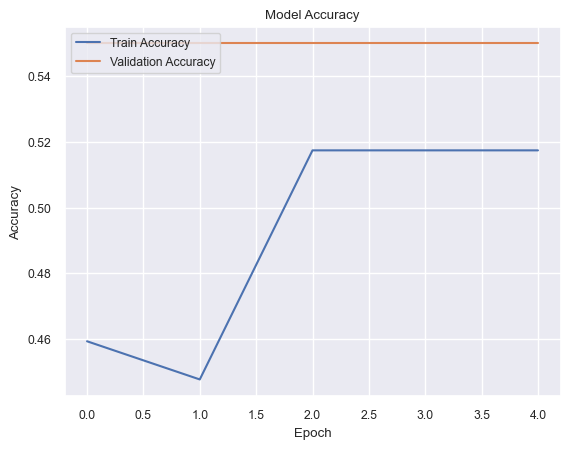

In [166]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

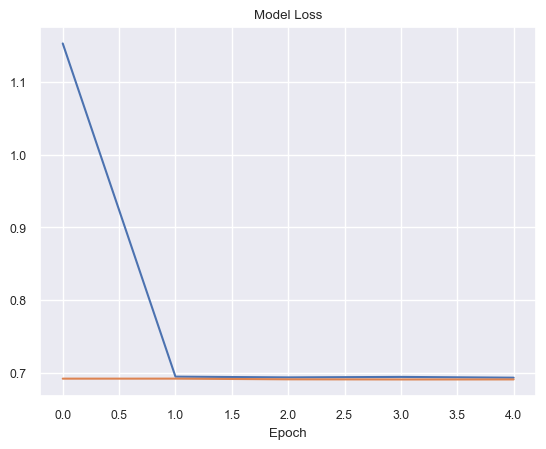

In [167]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel

In [168]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


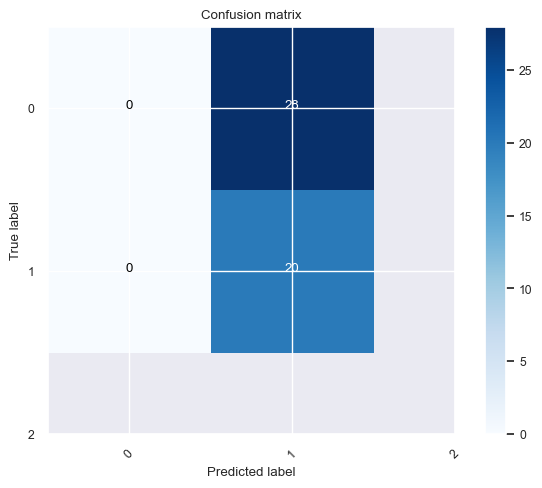

In [169]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)


Y_true = np.argmax(y_test, axis=1)  # Test süreci için


confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


plot_confusion_matrix(confusion_mtx, classes=range(3))

In [170]:
from sklearn.metrics import classification_report

report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.42      1.00      0.59        20

    accuracy                           0.42        48
   macro avg       0.21      0.50      0.29        48
weighted avg       0.17      0.42      0.25        48



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [171]:
os.chdir(r"C:\Users\emirt\OneDrive\Desktop\cats_and_dogs\models")  # Modeli kaydetmek için dizini değiştir
model.save('model1.h5')

In [172]:
preds = model.predict(x_test)
y_pred = np.zeros_like(preds)
y_pred[np.arange(len(preds)), preds.argmax(1)] = 1

classes = ['cat', 'dog']
confusionMatrix = np.zeros((len(classes), len(classes)))

for i in range(len(y_test)):
    if np.array_equal(y_pred[i], y_test[i]):
        index = np.argmax(y_test[i])
        confusionMatrix[index, index] += 1
    else:
        index1 = np.argmax(y_test[i])
        index2 = np.argmax(y_pred[i])
        confusionMatrix[index1, index2] += 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step


In [173]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.42      1.00      0.59        20

    accuracy                           0.42        48
   macro avg       0.21      0.50      0.29        48
weighted avg       0.17      0.42      0.25        48

Accuracy Score : 
0.4166666666666667
--------------------------------------------------
Confusion Matrix : 
[[ 0. 28.]
 [ 0. 20.]]
--------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


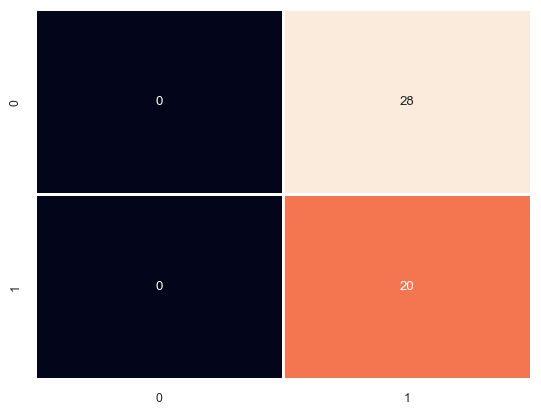

In [174]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

print("Accuracy Score : ")
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.set_theme(font_scale=0.8)
sns.heatmap(confusionMatrix, annot=True, linewidths=1.0, cbar=False)

print("--------------------------------------------------")
print("Confusion Matrix : ")
print(confusionMatrix)
print("--------------------------------------------------")

In [175]:
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False,  
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=False,  
    vertical_flip=False  
)

datagen.fit(x_train)  # datagen’i x_train üzerinden çalıştır ve veri üret

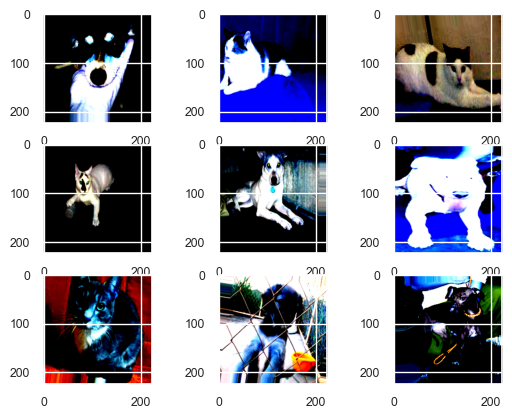

In [176]:
from matplotlib import pyplot

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
   
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(224, 224, 3))

   
    pyplot.show()
    break

In [177]:
history = model.fit(datagen.flow(np.array(x_train), np.array(y_train), batch_size=bs),  
    epochs=epc, validation_data=datagen.flow(np.array(x_validate),  
    np.array(y_validate), batch_size=bs), verbose=1,  
    steps_per_epoch=x_train.shape[0] // bs,  
    callbacks=[learning_rate_reduction])

Epoch 1/5


C:\Users\emirt\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 462ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6913 - learning_rate: 5.0000e-04
Epoch 2/5
 1/21 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.6250 - loss: 0.6944

C:\Users\emirt\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6250 - loss: 0.6944 - val_accuracy: 0.5500 - val_loss: 0.6912 - learning_rate: 5.0000e-04
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step - accuracy: 0.4595 - loss: 0.6961 - val_accuracy: 0.5500 - val_loss: 0.6914 - learning_rate: 5.0000e-04
Epoch 4/5
 1/21 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.7500 - loss: 0.6836
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7500 - loss: 0.6836 - val_accuracy: 0.5500 - val_loss: 0.6913 - learning_rate: 5.0000e-04
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - accuracy: 0.5335 - loss: 0.6924 - val_accuracy: 0.5500 - val_loss: 0.6910 - learning_rate: 2.5000e-04


In [178]:
NUM_CLASSES = 2
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False

NameError: name 'base_model' is not defined

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=bs,  
    epochs=epc, validation_data=(x_validate, y_validate),  
    verbose=1, callbacks=[learning_rate_reduction])  

In [ ]:
history = model.fit_generator(datagen.flow(np.array(x_train), np.array(y_train), batch_size=bs),  
    epochs=epc, validation_data=datagen.flow(np.array(x_validate), np.array(y_validate), batch_size=bs),  
    verbose=1, steps_per_epoch=x_train.shape[0] // bs,  
    callbacks=[learning_rate_reduction])  